## Install & Import Libraries

In [ ]:
!pip install xgboost
!pip install joblib

In [2]:
import pandas as pd
import numpy as np

# for easier visualization
#import seaborn as sns

# for visualization and to display plots
##from matplotlib import pyplot as plt
#%matplotlib inline

# import color maps
#from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt


# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import classification_report

#from xgboost import XGBRegressor
#from xgboost import plot_importance  # to plot feature importance

## Load Data

In [3]:
property_data = pd.read_csv('Property Record With Profile.csv')
property_data.head()

,Unnamed: 0,address,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,...,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park,Sub_Lat,Sub_Long
0,0,4/44 Myers Street,510000.0,2020-09-01,0,NaN,NaN,NaN,NaN,NaN,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
1,1,9 The Esplanade,2375000.0,2020-08-29,1,NaN,NaN,NaN,NaN,NaN,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
2,2,158 Garden Street,1240000.0,2020-08-01,0,155000.0,2001-08-01,NaN,NaN,667.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
3,3,86 Sydney Parade,560000.0,2020-08-15,1,65000.0,1996-03-01,NaN,NaN,319.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257
4,4,2/52 Mundy Street,720000.0,2020-08-01,0,657000.0,2016-01-01,500.0,2014-09-01,410.0,...,10,1,8,20,3,85,4,1,-38.150341,144.361257


In [4]:
property_data = property_data.drop(['Unnamed: 0', 'address', 'Sub_Lat', 'Sub_Long'], axis=1)
property_data.head()

,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,Building Size SQM,Bedrooms,...,Cars,Suburb,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park
0,510000.0,2020-09-01,0,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,Geelong,10,1,8,20,3,85,4,1
1,2375000.0,2020-08-29,1,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,Geelong,10,1,8,20,3,85,4,1
2,1240000.0,2020-08-01,0,155000.0,2001-08-01,NaN,NaN,667.0,214.0,3,...,1,Geelong,10,1,8,20,3,85,4,1
3,560000.0,2020-08-15,1,65000.0,1996-03-01,NaN,NaN,319.0,NaN,3,...,0,Geelong,10,1,8,20,3,85,4,1
4,720000.0,2020-08-01,0,657000.0,2016-01-01,500.0,2014-09-01,410.0,NaN,5,...,2,Geelong,10,1,8,20,3,85,4,1


In [5]:
property_data.describe()

,Sell Price,Auction,Last Sell Price,Rent Amount PW,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Cars,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park
count,1.308000e+04,13080.000000,5.674000e+03,2274.000000,1.250600e+04,6750.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000,13080.000000
mean,5.497499e+05,0.086009,2.854985e+05,469.868514,2.519515e+03,70.574118,2.626453,1.245795,1.588226,15.422324,0.265138,5.390826,3.394113,2.239450,13.533869,1.610092,1.455581
std,3.079223e+05,0.280388,1.788578e+05,2089.096219,2.867698e+04,209.604103,1.432714,0.830398,1.355813,8.703548,0.441423,1.968832,3.510248,2.039747,13.607040,0.765765,0.597174
min,5.133000e+04,0.000000,5.000000e+04,100.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000
25%,3.950000e+05,0.000000,1.691250e+05,310.000000,3.990000e+02,0.000000,2.000000,1.000000,1.000000,8.000000,0.000000,4.000000,1.000000,1.000000,6.000000,1.000000,1.000000
50%,5.050000e+05,0.000000,2.550000e+05,350.000000,5.860000e+02,0.000000,3.000000,1.000000,2.000000,15.000000,0.000000,5.000000,2.000000,1.000000,12.000000,1.000000,1.000000
75%,6.310000e+05,0.000000,3.600000e+05,420.000000,6.840000e+02,121.000000,4.000000,2.000000,2.000000,22.000000,1.000000,7.000000,5.000000,3.000000,15.000000,2.000000,2.000000
max,1.300000e+07,1.000000,2.250000e+06,70000.000000,1.039838e+06,7014.000000,12.000000,12.000000,17.000000,31.000000,1.000000,10.000000,20.000000,7.000000,85.000000,4.000000,3.000000


In [6]:
property_data.describe(include=['object'])

,Sell Date,Last Sell Date,Rent Date,Suburb
count,13080,5674,2274,13080
unique,1114,420,176,30
top,2020-08-01,2000-02-01,2019-11-01,Highton
freq,412,190,107,727


<AxesSubplot:xlabel='count', ylabel='Suburb'>

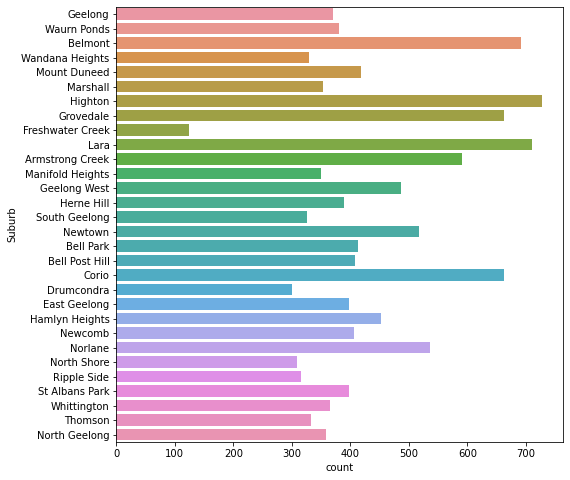

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(y='Suburb', data=property_data)

## Feature Engineering

In [7]:
property_data.corr()

,Sell Price,Auction,Last Sell Price,Rent Amount PW,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Cars,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park
Sell Price,1.000000,0.072449,0.516942,0.144757,0.072441,0.060355,0.235797,0.280441,0.153390,-0.013067,-0.032947,0.201215,0.167023,0.137299,0.177536,0.219437,-0.011306
Auction,0.072449,1.000000,0.049670,-0.020129,-0.015031,0.099123,0.008040,-0.022501,-0.013426,-0.021684,-0.044033,0.043119,0.076566,0.005297,0.068646,0.091392,-0.066909
Last Sell Price,0.516942,0.049670,1.000000,0.043921,0.112195,0.125588,0.142622,0.224907,0.125063,-0.041813,0.019102,0.153721,0.177907,0.085314,0.187748,0.200119,-0.025840
Rent Amount PW,0.144757,-0.020129,0.043921,1.000000,0.000988,0.170370,-0.058798,-0.047143,-0.028700,0.035362,0.057793,0.076927,-0.006396,-0.015367,0.029874,0.068614,-0.025748
Land Size SQM,0.072441,-0.015031,0.112195,0.000988,1.000000,0.022947,-0.074679,-0.054505,-0.040321,-0.042533,-0.034024,-0.044880,-0.062791,-0.009824,-0.007890,-0.050722,-0.045394
Building Size SQM,0.060355,0.099123,0.125588,0.170370,0.022947,1.000000,-0.014562,0.013776,0.010024,0.032046,0.031680,0.018956,-0.040566,-0.080061,-0.015446,-0.012291,-0.037597
Bedrooms,0.235797,0.008040,0.142622,-0.058798,-0.074679,-0.014562,1.000000,0.786674,0.579082,-0.041183,-0.054347,0.045526,0.011777,0.079979,-0.065797,-0.042587,0.094634
Toilets,0.280441,-0.022501,0.224907,-0.047143,-0.054505,0.013776,0.786674,1.000000,0.554686,-0.044588,-0.049105,0.082472,0.027409,0.056162,-0.029120,-0.026025,0.113526
Cars,0.153390,-0.013426,0.125063,-0.028700,-0.040321,0.010024,0.579082,0.554686,1.000000,-0.027377,0.008947,0.009566,-0.010817,0.050309,-0.062380,-0.042863,0.089122
Suburb_Code,-0.013067,-0.021684,-0.041813,0.035362,-0.042533,0.032046,-0.041183,-0.044588,-0.027377,1.000000,0.147414,-0.064613,-0.286072,-0.364284,-0.142524,-0.060642,-0.062926


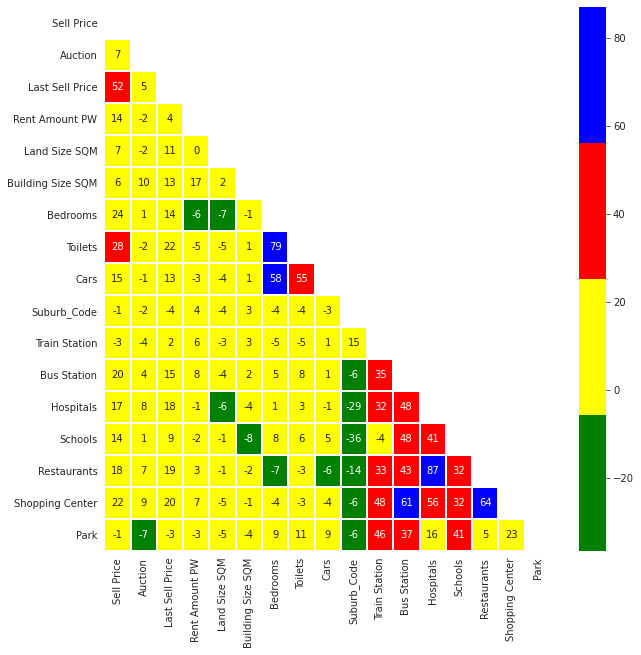

In [8]:
mask=np.zeros_like(property_data.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(property_data.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Outliers

<AxesSubplot:xlabel='Cars'>

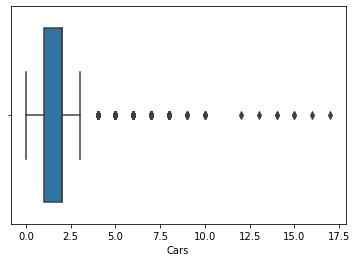

In [9]:
sns.boxplot(property_data['Cars'])

In [8]:
property_data['Cars'].sort_values(ascending=False).head()

4719     17
3957     16
10330    15
5824     15
7715     14
Name: Cars, dtype: int64

In [9]:
property_data[property_data['Cars'] == 17]

,Sell Price,Sell Date,Auction,Last Sell Price,Last Sell Date,Rent Amount PW,Rent Date,Land Size SQM,Building Size SQM,Bedrooms,...,Cars,Suburb,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park
4719,1050000.0,2019-02-08,0,NaN,NaN,NaN,NaN,20234.0,0.0,5,...,17,Lara,16,1,6,6,3,15,2,3


## Fill NaN Values

In [10]:
# Display number of missing values by numeric feature
property_data.select_dtypes(exclude=['object']).isnull().sum()

Sell Price               0
Auction                  0
Last Sell Price       7406
Rent Amount PW       10806
Land Size SQM          574
Building Size SQM     6330
Bedrooms                 0
Toilets                  0
Cars                     0
Suburb_Code              0
Train Station            0
Bus Station              0
Hospitals                0
Schools                  0
Restaurants              0
Shopping Center          0
Park                     0
dtype: int64

In [11]:
property_data['Last Sell Price'] = property_data['Last Sell Price'].fillna(0.0)
property_data['Rent Amount PW'] = property_data['Rent Amount PW'].fillna(0.0)

In [12]:
s = property_data.groupby('Suburb')['Land Size SQM'].mean()
property_data['Land Size SQM'] = property_data['Land Size SQM'].fillna(property_data['Suburb'].map(s))
s

Suburb
Armstrong Creek        707.661626
Bell Park              541.458228
Bell Post Hill         589.218593
Belmont                611.720177
Corio                  608.577273
Drumcondra             655.457143
East Geelong           433.532808
Freshwater Creek    196583.734513
Geelong                548.960000
Geelong West           415.029350
Grovedale              616.534456
Hamlyn Heights         594.088036
Herne Hill             510.331536
Highton                704.931755
Lara                  1386.087977
Manifold Heights       530.380814
Marshall               853.646884
Mount Duneed          2944.775449
Newcomb                611.501266
Newtown                623.234940
Norlane                589.049336
North Geelong          510.874302
North Shore            510.749104
Ripple Side            538.800687
South Geelong         1264.990228
St Albans Park         660.691517
Thomson                492.310241
Wandana Heights       1164.261682
Waurn Ponds           1207.388140
Whittin

In [13]:
s = property_data.groupby('Suburb')['Building Size SQM'].mean()
property_data['Building Size SQM'] = property_data['Building Size SQM'].fillna(property_data['Suburb'].map(s))
s

Suburb
Armstrong Creek      76.177845
Bell Park           112.704690
Bell Post Hill      117.637030
Belmont              25.262868
Corio                47.111243
Drumcondra          175.411765
East Geelong         70.717772
Freshwater Creek    212.916667
Geelong              73.347773
Geelong West         52.945297
Grovedale            46.111846
Hamlyn Heights       48.187976
Herne Hill           61.425150
Highton              53.903282
Lara                 59.774350
Manifold Heights    105.427398
Marshall            103.752866
Mount Duneed        100.932184
Newcomb              89.796602
Newtown              55.257046
Norlane              58.013127
North Geelong       123.240464
North Shore          79.565217
Ripple Side         142.989362
South Geelong       179.333333
St Albans Park       70.381839
Thomson               0.865332
Wandana Heights     191.638285
Waurn Ponds         114.044125
Whittington          72.461107
Name: Building Size SQM, dtype: float64

In [14]:
property_data['Sell Date'] = pd.to_datetime(property_data['Sell Date'])
property_data['Last Sell Date'] = pd.to_datetime(property_data['Last Sell Date'])
property_data['Last Sell Days'] = property_data['Sell Date'].sub(property_data['Last Sell Date'], axis=0)
property_data['Last Sell Days'] = property_data['Last Sell Days'] / np.timedelta64(1, 'D')
property_data['Last Sell Days'] = property_data['Last Sell Days'].fillna(0.0)
property_data[['Sell Date', 'Last Sell Date', 'Last Sell Days']].head()

,Sell Date,Last Sell Date,Last Sell Days
0,2020-09-01,NaT,0.0
1,2020-08-29,NaT,0.0
2,2020-08-01,2001-08-01,6940.0
3,2020-08-15,1996-03-01,8933.0
4,2020-08-01,2016-01-01,1674.0


In [15]:
property_data = property_data.drop(['Rent Date', 'Sell Date', 'Last Sell Date', 'Suburb'], axis=1)

In [16]:
property_data.head()

,Sell Price,Auction,Last Sell Price,Rent Amount PW,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Cars,Suburb_Code,Train Station,Bus Station,Hospitals,Schools,Restaurants,Shopping Center,Park,Last Sell Days
0,510000.0,0,0.0,0.0,548.96,73.347773,0,0,0,10,1,8,20,3,85,4,1,0.0
1,2375000.0,1,0.0,0.0,548.96,73.347773,0,0,0,10,1,8,20,3,85,4,1,0.0
2,1240000.0,0,155000.0,0.0,667.00,214.000000,3,1,1,10,1,8,20,3,85,4,1,6940.0
3,560000.0,1,65000.0,0.0,319.00,73.347773,3,0,0,10,1,8,20,3,85,4,1,8933.0
4,720000.0,0,657000.0,500.0,410.00,73.347773,5,2,2,10,1,8,20,3,85,4,1,1674.0


## Apply Scalling

In [17]:
feature_cols = property_data.columns.tolist()
feature_cols

['Sell Price',
 'Auction',
 'Last Sell Price',
 'Rent Amount PW',
 'Land Size SQM',
 'Building Size SQM',
 'Bedrooms',
 'Toilets',
 'Cars',
 'Suburb_Code',
 'Train Station',
 'Bus Station',
 'Hospitals',
 'Schools',
 'Restaurants',
 'Shopping Center',
 'Park',
 'Last Sell Days']

In [18]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


In [19]:
# Create separate object for target variable
y = property_data['Sell Price']

# Create separate object for input features
X = property_data.drop('Sell Price', axis=1)

#y = y.values.reshape(-1, 1)

## Split Dataset for Test-Train

In [20]:
from sklearn import model_selection
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9156, 17) (3924, 17) (9156,) (3924,)


In [ ]:
'''scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)'''

## Baseline Model

In [ ]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [ ]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [ ]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  1.0170309324388513
R-squared:  0.0
Mean Absolute Error:  0.5787655450234297


In [ ]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  0.9591034826270118
R-squared:  -0.0001230915658156917
Mean Absolute Error:  0.5682765572726205


## Decision Tree Regression

In [ ]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [ ]:
print(model.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [ ]:
dt_model = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = dt_model.predict(X_test)
print(y_pred)

[629967.67515924 419440.20714631 419440.20714631 ... 581914.26858108
 348513.78187919 419440.20714631]


In [ ]:
#y_new_inverse = scalery.inverse_transform(y_pred)
#y_new_inverse

In [ ]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", rs(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  217292.38948838055
R-squared:  0.5185273995093157
Mean Absolute Error:  117813.28731738785


In [ ]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  218157.9101614007
R-squared:  0.4542228892350044
Mean Absolute Error:  121458.11624601936


In [ ]:
indices = np.argsort(-dt_model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Land Size SQM
Last Sell Price
Toilets
Schools
Suburb_Code
Hospitals
Shopping Center
Bedrooms
Bus Station
Restaurants
Last Sell Days
Building Size SQM
Rent Amount PW
Cars
Park
Train Station
Auction


## Random Forest Regression

In [ ]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
print(model.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
#y_pred = model.predict([[0, 0.0, 0.0, 371.0, 0.0, 3, 1, 1, 0, 7, 2, 1, 5, 3, 1, 0.0, 9]])
#y_pred

In [ ]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", rs(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  185360.47231687914
R-squared:  0.6496381581102527
Mean Absolute Error:  68633.64561483277


In [ ]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  200249.6779477898
R-squared:  0.5401490995261626
Mean Absolute Error:  93003.05731938295


In [ ]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Land Size SQM
Last Sell Price
Toilets
Schools
Bedrooms
Suburb_Code
Bus Station
Restaurants
Building Size SQM
Shopping Center
Last Sell Days
Hospitals
Cars
Rent Amount PW
Park
Auction
Train Station


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_reg = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

ridge_reg.fit(X_train, y_train)

print(ridge_reg.best_estimator_)
print(ridge_reg.best_score_)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
-0.4751640542005072


In [ ]:
ridge_reg.best_estimator_

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
## Predict Train results
y_train_pred = ridge_reg.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.9173838411922751
R-squared:  0.1863570823319608
Mean Absolute Error:  0.47383397949500305


In [ ]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.7451064194721831
R-squared:  0.3963862434625798
Mean Absolute Error:  0.39984717173452056


In [ ]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
model.fit(X_train, y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Toilets
Shopping Center
Last Sell Price
Train Station
Bus Station
Bedrooms
Land Size SQM
Restaurants
Suburb_Code
Park
Auction
Schools
Last Sell Days
Building Size SQM
Cars
Rent Amount PW
Hospitals


## Lasso

In [ ]:
from sklearn.linear_model import Lasso

tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_reg = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_estimator_)
print(lasso_reg.best_score_)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
-0.4747180761263331


In [ ]:
lasso_reg.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
## Predict Train results
y_train_pred = lasso_reg.predict(X_train)

In [ ]:
## Predict Test results
y_pred = lasso_reg.predict(X_test)

In [ ]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  0.9172399606746269
R-squared:  0.1866122823444778
Mean Absolute Error:  0.4735078117328407


In [ ]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  0.8434106334873407
R-squared:  0.22660624108635508
Mean Absolute Error:  0.4671290912670208


In [ ]:
## Building the model again with the best hyperparameters
lasso_model = Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
indices = np.argsort(-abs(lasso_model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Toilets
Shopping Center
Last Sell Price
Train Station
Bus Station
Land Size SQM
Bedrooms
Restaurants
Suburb_Code
Auction
Last Sell Days
Park
Rent Amount PW
Building Size SQM
Cars
Schools
Hospitals


## SVM Regression

In [ ]:
tuned_params = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
model.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
## Building the model again with the best hyperparameters
model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  0.6875570652897678
R-squared:  0.542965300286431
Mean Absolute Error:  0.24699026289908924


In [ ]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  0.719008965586855
R-squared:  0.4379290623138742
Mean Absolute Error:  0.32564223730484015


## KNN Regression 

In [ ]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


In [ ]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  0.7020517659241378
R-squared:  0.5234922721363253
Mean Absolute Error:  0.2961569960258551


In [ ]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  0.7363156161691472
R-squared:  0.41054515543757153
Mean Absolute Error:  0.34953452327074924


In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04305
Feature: 1, Score: 0.24264
Feature: 2, Score: 0.00574
Feature: 3, Score: 0.06420
Feature: 4, Score: 0.01734
Feature: 5, Score: 0.13101
Feature: 6, Score: 0.10724
Feature: 7, Score: 0.06321
Feature: 8, Score: 0.08497
Feature: 9, Score: 0.09711
Feature: 10, Score: 0.06155
Feature: 11, Score: 0.02251
Feature: 12, Score: 0.09527
Feature: 13, Score: 0.02143
Feature: 14, Score: 0.06231
Feature: 15, Score: 0.10689
Feature: 16, Score: 0.04960


In [ ]:
indices = np.argsort(-abs(importance))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Last Sell Price
Bedrooms
Toilets
Park
Train Station
Schools
Suburb_Code
Land Size SQM
Cars
Shopping Center
Bus Station
Last Sell Days
Auction
Hospitals
Restaurants
Building Size SQM
Rent Amount PW


## XGBoost Regression

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[07:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [ ]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  0.3541776628866251
R-squared:  0.8787242380847703
Mean Absolute Error:  0.20839584440569117


In [ ]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  0.9089520909026281
R-squared:  0.10173494496583368
Mean Absolute Error:  0.3153826290887328


In [ ]:
## Building the model again with the best hyperparameters
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(X_train, y_train)

[07:58:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

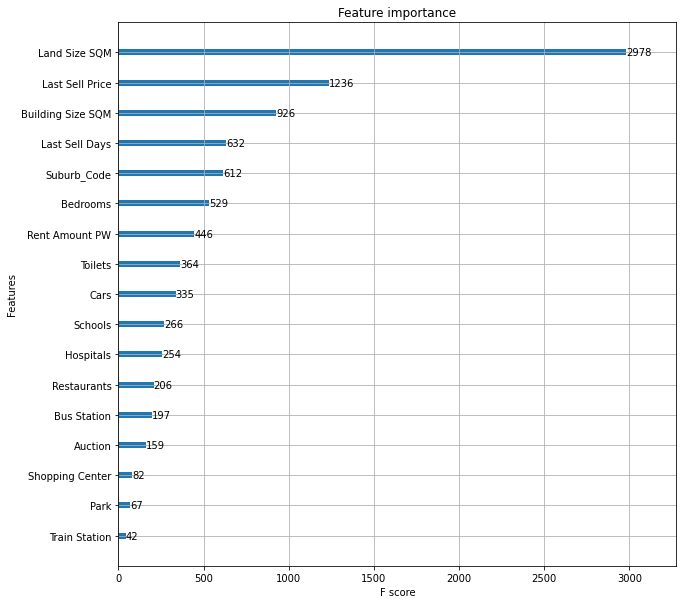

In [ ]:
my_plot_importance(model, (10,10))

## Neural Network

In [ ]:
# Regression Example With Boston Dataset: Standardized
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=17, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
from sklearn.metrics import accuracy_score
estimator.fit(X, y)
prediction = estimator.predict(X_test)
print("R-squared: ", rs(y_test, prediction))
print(prediction)

R-squared:  -3.490869642647721
[3.9003831e-01 7.0196161e+02 5.3407245e+02 ... 6.6518521e-01 5.4658759e+02
 2.0097809e-01]


## Re-Train Best Model With Important Features

In [21]:
property_data.columns

Index(['Sell Price', 'Auction', 'Last Sell Price', 'Rent Amount PW',
       'Land Size SQM', 'Building Size SQM', 'Bedrooms', 'Toilets', 'Cars',
       'Suburb_Code', 'Train Station', 'Bus Station', 'Hospitals', 'Schools',
       'Restaurants', 'Shopping Center', 'Park', 'Last Sell Days'],
      dtype='object')

In [22]:
# Create separate object for target variable
y = property_data['Sell Price']

non_contrib_feature = ['Sell Price', 'Auction', 'Rent Amount PW', 'Restaurants', 'Park', 'Last Sell Days', 'Train Station']
       
# Create separate object for input features
X = property_data.drop(non_contrib_feature, axis=1)

#y = y.values.reshape(-1, 1)

# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1234)

In [23]:
X.head()

,Last Sell Price,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Cars,Suburb_Code,Bus Station,Hospitals,Schools,Shopping Center
0,0.0,548.96,73.347773,0,0,0,10,8,20,3,4
1,0.0,548.96,73.347773,0,0,0,10,8,20,3,4
2,155000.0,667.00,214.000000,3,1,1,10,8,20,3,4
3,65000.0,319.00,73.347773,3,0,0,10,8,20,3,4
4,657000.0,410.00,73.347773,5,2,2,10,8,20,3,4


In [24]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train)

## Predict Test results
y_pred = model.predict(X_test)

In [25]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  204316.4245164842
R-squared:  0.5212817893559585
Mean Absolute Error:  95864.93376960364


In [26]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Land Size SQM
Last Sell Price
Toilets
Schools
Suburb_Code
Bedrooms
Bus Station
Building Size SQM
Shopping Center
Hospitals
Cars


## Save Model

In [27]:
import zipfile
import pickle
print("Export the model to model.pkl")
f=open('model.pkl', 'wb')
pickle.dump(model,f)
f.close()

zipfile.ZipFile('model.zip', mode='w').write('model.pkl')

Export the model to model.pkl


In [30]:
X.to_csv('Training_Data.csv', header=True)

In [31]:
X.head()

,Last Sell Price,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Cars,Suburb_Code,Bus Station,Hospitals,Schools,Shopping Center
0,0.0,548.96,73.347773,0,0,0,10,8,20,3,4
1,0.0,548.96,73.347773,0,0,0,10,8,20,3,4
2,155000.0,667.00,214.000000,3,1,1,10,8,20,3,4
3,65000.0,319.00,73.347773,3,0,0,10,8,20,3,4
4,657000.0,410.00,73.347773,5,2,2,10,8,20,3,4
